In [ ]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SchwiftyNotebook_convolution_model")' SchwiftyNotebook_convolution_model

Installing packages:
	.package(path: "/home/ubuntu/workspace/fast-ai-swift/SchwiftyNotebook_convolution_model")
		SchwiftyNotebook_convolution_model
With SwiftPM flags: []
Working in: /tmp/tmp8qvdnmdp/swift-install
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
Updating https://github.com/mxcl/Path.swift
Updating https://github.com/saeta/Just
Updating https://github.com/latenitesoft/NotebookExport
Completed resolution in 1.59s
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version infor

In [2]:
//export
import Path
import TensorFlow
import SchwiftyNotebook_convolution_model

In [7]:
import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

public let plotter = Python.import("matplotlib.pyplot")

# Data Setup

In [8]:
let n = 100
let inputPoints = TensorFloat(randomNormal: [100, 1])
let A = inputPoints.concatenated(with: TensorFloat(ones: inputPoints.shape), alongAxis: 1)
A.shape

▿ [100, 2]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 2


In [9]:
let yValidationPoints = matmul(A, TensorFloat([-2, 7]).expandingShape(at: 1)) + 
                (TensorFloat(randomNormal: inputPoints.shape, seed: (69, 420)) * 2.5)
yValidationPoints.shape

▿ [100, 1]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 1


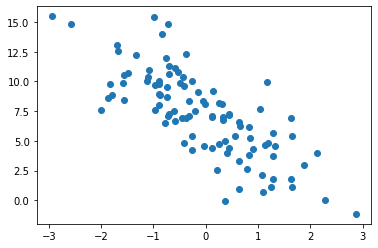

None


In [10]:
plotter.scatter(x: A.slice(lowerBounds: [0, 0], upperBounds:[A.shape[0], 1] ).makeNumpyArray(), 
                y: yValidationPoints.makeNumpyArray())
plotter.show()

# Model Creation

In [12]:
@differentiable
func squareBoi(inputTensor: TensorFloat) -> TensorFloat {
    return inputTensor * inputTensor
}

let (squared, squareGradientChain) = valueWithPullback(at: TensorFloat([2, 3]), in: squareBoi)
print(squared)
print(type(of: squareGradientChain))
grad

[4.0, 9.0]
(Tensor<Float>) -> Tensor<Float>
